In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split

In [26]:
df=pd.read_csv("Position_Salaries.csv")[['Level','Salary']]

In [28]:
df

,Level,Salary
0,1,45000
1,2,50000
2,3,60000
3,4,80000
4,5,110000
5,6,150000
6,7,200000
7,8,300000
8,9,500000
9,10,1000000


In [57]:
x=df[['Level']].values
y=df['Salary'].values
df.isna().sum()

Level     0
Salary    0
dtype: int64

In [79]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=52)

In [81]:
linReg=LinearRegression()

In [83]:
linReg.fit(x_train,y_train)

LinearRegression()

In [85]:
y_pred_linReg=linReg.predict(x_test)

In [87]:
mse_linReg=mean_squared_error(y_test,y_pred_linReg)

In [89]:
print("Linear Regression MSE:",round(mse_linReg,2))

Linear Regression MSE: 171893994698.53


In [96]:
poly = PolynomialFeatures(degree=4)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)
polFeature = LinearRegression()
polFeature.fit(x_train_poly,y_train)
y_pred_polFeature = polFeature.predict(x_test_poly)
mse_polFeature = mean_squared_error(y_test, y_pred_polFeature)
print("Polynomial Features MSE:", round(mse_polFeature, 2))

Polynomial Features MSE: 13131923258.94


In [106]:
x_pred = np.array([[11], [12]])
y_pred_linear = linReg.predict(x_pred)
print("Linear Regression Predictions for levels 11 and 12:",y_pred_linear)

Linear Regression Predictions for levels 11 and 12: [465751.87969925 516441.10275689]


In [110]:
y_pred_poly = polFeature.predict(poly.transform(x_pred))
print("Polynomial Regression Predictions for levels 11 and 12:",y_pred_poly)

Polynomial Regression Predictions for levels 11 and 12: [1387947.50430336 2224836.35842154]


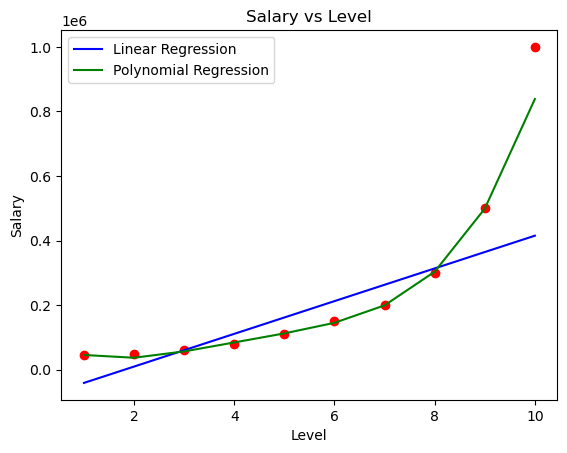

In [114]:
plt.scatter(x, y, color='red')
plt.plot(x, linReg.predict(x), color='blue', label='Linear Regression')
plt.plot(x, polFeature.predict(poly.transform(x)), color='green', label='Polynomial Regression')
plt.title('Salary vs Level')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.legend()
plt.show()